1880


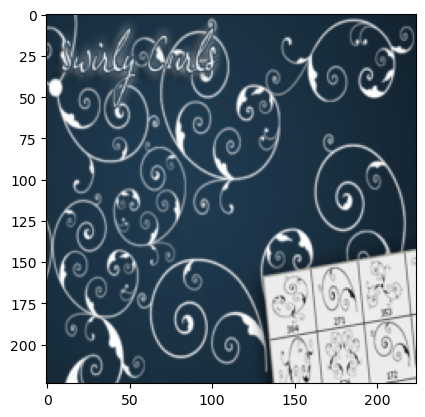

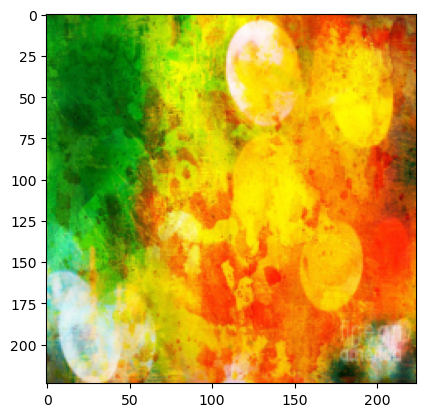

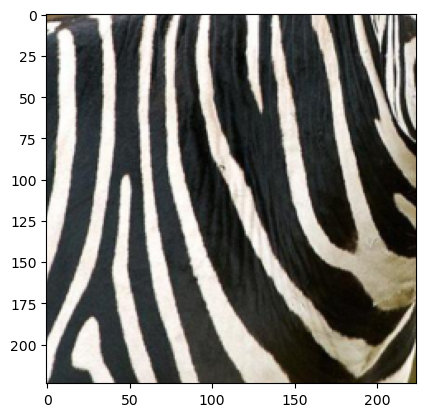

In [1]:
"""
 @Time    : 2023-03-21 07:29:40
 @Author  : Hong-Shuo Chen
 @E-mail  : hongshuo@usc.edu
 
 @Project : Camouflage Object Detection
 @File    : image_clustering.py
 @Function: Image Clustering
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_data = torchvision.datasets.DTD(root='./data', download=True, transform=transform)
print(len(train_data))

train_data_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True)
images, labels = next(iter(train_data_loader))
for i in range(3):
    plt.imshow(images[i].permute(1,2,0))
    plt.show()


In [2]:
from image_clustering import ImageClustering
num_clusters = 64
image_cluster = ImageClustering(num_clusters=num_clusters, batch_size=100, num_bins=[12,4,4], color_space="hsv", random_state=0, num_workers=32)

for images, labels in tqdm(train_data_loader):
    image_cluster.partial_fit(images)
del images, labels

100%|██████████| 19/19 [00:19<00:00,  1.02s/it]


In [3]:
test_data = torchvision.datasets.DTD(root='./data', download=True, transform=transform, split="test")
test_data_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=len(test_data),
                                          shuffle=True)

images, labels = next(iter(test_data_loader))
cluster_labels = image_cluster.predict(images)

In [4]:
def plot(images, path=None, nrows=3, ncols=4):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*2, nrows*2),
                            subplot_kw={'xticks': [], 'yticks': []})
    i = 0
    for ax in axs.flat:
        if i < len(images):
            ax.imshow(images[i].permute(1,2,0))
            i = i + 1
        
    plt.tight_layout()
    plt.savefig(path)
    plt.close()
    
for i in range(num_clusters):
    print("Cluster", i, "Number of images", np.sum(cluster_labels == i))
    plot(images[cluster_labels == i], path="img/cluster_" + str(i) + ".png", nrows=3, ncols=4)
del images, labels, cluster_labels

Cluster 0 Number of images 3
Cluster 1 Number of images 14
Cluster 2 Number of images 46
Cluster 3 Number of images 15
Cluster 4 Number of images 27
Cluster 5 Number of images 307
Cluster 6 Number of images 100
Cluster 7 Number of images 72
Cluster 8 Number of images 24
Cluster 9 Number of images 20
Cluster 10 Number of images 5
Cluster 11 Number of images 66
Cluster 12 Number of images 54
Cluster 13 Number of images 20
Cluster 14 Number of images 13
Cluster 15 Number of images 23
Cluster 16 Number of images 9
Cluster 17 Number of images 6
Cluster 18 Number of images 9
Cluster 19 Number of images 33
Cluster 20 Number of images 2
Cluster 21 Number of images 13
Cluster 22 Number of images 7
Cluster 23 Number of images 29
Cluster 24 Number of images 10
Cluster 25 Number of images 26
Cluster 26 Number of images 6
Cluster 27 Number of images 17
Cluster 28 Number of images 15
Cluster 29 Number of images 15
Cluster 30 Number of images 67
Cluster 31 Number of images 3
Cluster 32 Number of imag